In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define Model

In [16]:
# Define the Linear Regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)  # Single input and single output

    def forward(self, x):
        return self.linear(x)


## Generate Data

In [17]:
# Generate synthetic data
np.random.seed(42)
x = np.random.rand(100, 1)  # Random dataset of shape (100, 1)
y = 2.0 * x + 1.0 + 0.1 * np.random.randn(100, 1)  # Linear relation with some noise

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

## Train

Epoch [10/100], Loss: 0.2121
Epoch [20/100], Loss: 0.1475
Epoch [30/100], Loss: 0.1129
Epoch [40/100], Loss: 0.0869
Epoch [50/100], Loss: 0.0673
Epoch [60/100], Loss: 0.0526
Epoch [70/100], Loss: 0.0416
Epoch [80/100], Loss: 0.0333
Epoch [90/100], Loss: 0.0270
Epoch [100/100], Loss: 0.0223


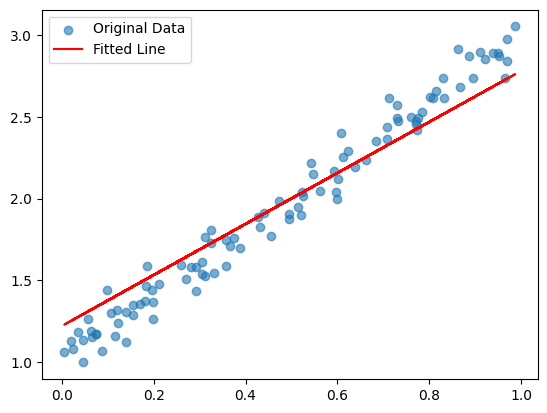

In [18]:
model = LinearRegression()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotting
predicted = model(x_tensor).detach().numpy()
plt.scatter(x, y, label='Original Data', alpha=0.6)
plt.plot(x, predicted, label='Fitted Line', color='red')
plt.legend()
plt.show()


## Save Model

In [19]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
linear.weight 	 torch.Size([1, 1])
linear.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}
param_groups 	 [{'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]


In [20]:
model_path = "./linear_regression.pth"

# Save the model
torch.save(model.state_dict(), model_path)

# Delete the existing model variable
del model

# Initialize the model again
model = LinearRegression()
model.load_state_dict(torch.load(model_path))
model.eval()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)